In [28]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import IPython.display
import sys

In [29]:
def bin2dec(bin_str):
    return int(bin_str, 2)

def dec2bin(dec_str,pad):
    pad = int(pad)
    b = bin(dec_str).replace('0b','')
    #print(b)
    while len(b)<pad:
        b = '0' + b
    return b

def shift_left(tab,n):
    return tab[n:] + tab[:n]

def permute(k,perm):
    new = [k[number] for number in perm]
    return ''.join(new)

def xor(bin_str1,bin_str2):
    new = ""
    for i in range(len(bin_str1)):
        if (bin_str1[i]=='0' and bin_str2[i]=='0'):
            new += '0'
        elif (bin_str1[i]=='1' and bin_str2[i]=='1'):
            new += '0'
        elif (bin_str1[i]=='0' and bin_str2[i]=='1'):
            new += '1'
        elif (bin_str1[i]=='1' and bin_str2[i]=='0'):
            new += '1'
        else:
            pass
    return new

PC1 = [56, 48, 40, 32, 24, 16,  8,  0, 57, 49, 41, 33, 25, 17,  9,  1, 58,
       50, 42, 34, 26, 18, 10,  2, 59, 51, 43, 35, 62, 54, 46, 38, 30, 22,
       14,  6, 61, 53, 45, 37, 29, 21, 13,  5, 60, 52, 44, 36, 28, 20, 12,
        4, 27, 19, 11,  3] 

shift_table = [1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1 ] 

PC2=[13, 16, 10, 23,  0,  4,  2, 27, 14,  5, 20,  9, 22, 18, 11,  3,
     25, 7, 15,  6, 26, 19, 12,  1, 40, 51, 30, 36, 46, 54, 29, 39,
     50, 44, 32, 47, 43, 48, 38, 55, 33, 52, 45, 41, 49, 35, 28, 31]

def key_schedule(key):
    subkeys = []
    permute_key = permute(key,PC1) # klucz 56 bitowy
    left = permute_key[:int(len(permute_key)/2)] 
    right = permute_key[int(len(permute_key)/2):]
    for element in shift_table:
        left = shift_left(left,element) 
        right = shift_left(right, element)
        permute_key_pc2 = permute((left + right),PC2)
        subkeys.append(permute_key_pc2)
    return subkeys

def Feistel(message, subkeys, F):
    left_side = message[:int(len(message)/2)] #dzielenie po 32 bity
    right_side = message[int(len(message)/2):]
    rounds=len(subkeys) ##
    for i in range(len(subkeys)):
        f_func = F(right_side,subkeys[i])
        left_side = xor(f_func, left_side) # xor funkcji f z lewą połową wiadomosci
        if(i!=15):
            right_side, left_side = left_side, right_side # zamien miejscami lewo i prawo oprocz ostatniego razu
    return left_side + right_side
            
def F(right, subkey):
    e_permute = permute(right,E) #permutacja rozszerz.
    xor_permute = xor(e_permute, subkey) #xor ciagu z kluczem
    f_res = ""
    for i in range(8):
        group = xor_permute[6*i:6*(i+1)] #ciag dzielimy na 8 boxow po 6 bitow
        row = bin2dec(group[0] + group[-1]) # pierwszy i ostatni bit na dec, nr wiersza
        col = bin2dec(group[1:-1]) # wszystkie pomiedzy na dec, nr kolumny
        f_res+=dec2bin(SBox[i][row][col],4) # element z macierzy do zapisu binarnego
    f_res=permute(f_res,P)
    return f_res

E = [31,  0,  1,  2,  3,  4,  3,  4,  5,  6,  7,  8,  7,  8,  9, 10, 11,
       12, 11, 12, 13, 14, 15, 16, 15, 16, 17, 18, 19, 20, 19, 20, 21, 22,
       23, 24, 23, 24, 25, 26, 27, 28, 27, 28, 29, 30, 31,  0]

SBox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7], 
        [ 0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8], 
        [ 4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0], 
        [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13 ]], 
        
        [[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10], 
        [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5], 
        [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15], 
        [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9 ]], 

        [ [10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8], 
        [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1], 
        [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7], 
        [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12 ]], 

        [ [7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15], 
         [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9], 
         [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4], 
         [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14] ], 

        [ [2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9], 
        [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6], 
        [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14], 
        [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3 ]], 
        
        [ [12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11], 
        [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8], 
         [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6], 
         [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13] ],
        
        [ [4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1], 
        [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6], 
        [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2], 
        [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12] ], 

        [ [13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7], 
         [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2], 
         [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8], 
         [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11] ] ] 

P = [ 15,  6, 19, 20, 28, 11, 27, 16,  0, 14, 22, 25,  4, 17, 30,  9,  1,
        7, 23, 13, 31, 26,  2,  8, 18, 12, 29,  5, 21, 10,  3, 24] 

def DES(message, subkeys):
    return permute(Feistel(permute(message,IP),subkeys, F), FP)

IP = [57, 49, 41, 33, 25, 17,  9,  1, 59, 51, 43, 35, 27, 19, 11,  3, 61,
       53, 45, 37, 29, 21, 13,  5, 63, 55, 47, 39, 31, 23, 15,  7, 56, 48,
       40, 32, 24, 16,  8,  0, 58, 50, 42, 34, 26, 18, 10,  2, 60, 52, 44,
       36, 28, 20, 12,  4, 62, 54, 46, 38, 30, 22, 14,  6] 

FP = [39,  7, 47, 15, 55, 23, 63, 31, 38,  6, 46, 14, 54, 22, 62, 30, 37,
        5, 45, 13, 53, 21, 61, 29, 36,  4, 44, 12, 52, 20, 60, 28, 35,  3,
       43, 11, 51, 19, 59, 27, 34,  2, 42, 10, 50, 18, 58, 26, 33,  1, 41,
        9, 49, 17, 57, 25, 32,  0, 40,  8, 48, 16, 56, 24]

# Lista 6 (11 pkt.)

## Zadanie 1 (1 pkt.)

Wczytaj obrazek $\textit{miki.png}$

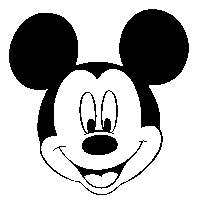

In [30]:
def dec2bin(dec_str,pad):
    return format(int(dec_str),'0'+str(pad)+'b')

img=Image.open('miki.png')
arr=np.array(img).ravel()
arr_bin=[dec2bin(d,pad='8') for d in arr]
bits=''.join(arr_bin)
img

i zaszyfruj go za pomocą DESa z kluczem:

In [31]:
key='0111101000001010110010000001010101111111100000000000101000110001'

In [32]:
subkeys= key_schedule(key)

img_t = ""
for i in range(int(len(bits)/64)):
    tmp = bits[i*64: i*64+64]
    img_t += DES(tmp,subkeys)

    

stosując szyfrowanie blok po bloku, czyli tak jak na liście 3., tzn. w trybie ECB.

<img src="ECB_encryption.svg" width="1000" align="left"/>
<img src="ECB_decryption.svg" width="1000" align="left"/>

Wyświetl zaszyfrowany obrazek.

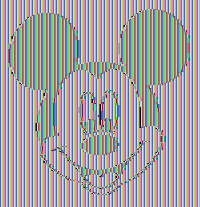

In [33]:
def split_img(img_bin,n):
    img_split=[]
    for i in range(0, len(img_bin), n):
        img_split.append(img_bin[i:i+n])
    return img_split

#img_t to ciąg bitów po zaszyfrowaniu
img=np.array([bin2dec(b) for b in split_img(img_t,8)]).reshape(np.array(img).shape)
Image.fromarray(np.uint8(np.array(img)))



Mimo zaszyfrowania łatwo rozpoznać co było na obrazku.

## Zadanie 2 (2 pkt.)

Zaimplementuj tryb szyfrowania CBC.

<img src="CBC_encryption.svg" width="1000" align="left"/>

In [34]:
def CBC(msg, key, iv):
    keys = key_schedule(key)
    result = ""
    for i in range(int(len(msg) / 64)):
        block = msg[i * 64: i * 64 + 64]
        block = xor(block, iv)
        iv = DES(block, keys)
        result += iv

    return result

In [35]:
#key to zmienna z poprzedniego zadania
iv='0011111111001100000111011100110100100101010100000111010001000110'
msg='1000110001101011011101110010100111101111101100111100001010100001011111110100000100100000111011001011000001011100110111101111110100000000100101011101110010000000110011011100000111000110011100111000010111111111011111000110001010101001101111110000010110011011'
print(CBC(msg,key,iv)=='1111101000110001101111001100101101011001101010001101010101100111011001100111010011001011100001001111011000001111110010011110011101010000101011010011011100011110011011001011100100011100011001011101110011110001110100010111001100100010111101011111101010111000')

True


Zaszyfruj obrazek z zadania 1. za pomocą DESa w trybie CBC, zaszyfrowany obrazek wyświetl i zobacz czy nadal widoczna jest na nim Myszka Miki.

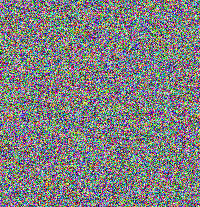

In [36]:
img_t = CBC(bits,key,iv)
img=np.array([bin2dec(b) for b in split_img(img_t,8)]).reshape(np.array(img).shape)
Image.fromarray(np.uint8(np.array(img)))

## Zadanie 3 (1 pkt.)

Zaimplementuj deszyfrację w trybi CBC. Zdeszyfruj zaszyfrowany w poprzednim zadaniu obrazek i sprawdź czy otrzymałeś pierwotny obrazek.

<img src="CBC_decryption.svg" width="1000" align="left"/>

In [37]:
def CBCde(msg, key, iv):
    keys = key_schedule(key)
    result = ""
    for i in range(int(len(msg) / 64)):
        ciphered = msg[i * 64: i * 64 + 64]
        block = DES(ciphered, keys[::-1])
        result += xor(block, iv)
        iv = ciphered

    return result            

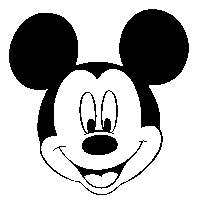

In [38]:
arr = np.array(img).ravel()
arr_bin = [dec2bin(d, pad='8') for d in arr]
bits = ''.join(arr_bin)

img_t = CBCde(bits, key, iv)

#img_t to ciąg bitów po zaszyfrowaniu
img=np.array([bin2dec(b) for b in split_img(img_t, 8)]).reshape(np.array(img).shape)
Image.fromarray(np.uint8(np.array(img)))

## Zadanie 4 (2 pkt.)

Zaimplementuj tryb OFB. W tym trybie zarówno szyfracja jak i deszyfracja odbywają się za pomocą dokładnie tego samego algorytmu.

<img src="OFB_encryption.svg" width="1000" align="left"/>
<img src="OFB_decryption.svg" width="1000" align="left"/>

In [39]:
def OFB(msg, key, iv):
    keys = key_schedule(key)
    result = ""
    for i in range(int(len(msg) / 64)):
        block = DES(iv, keys)
        plaintext = msg[i * 64: i * 64 + 64]
        result += xor(plaintext, block)
        iv = block
    return result

In [40]:
print(OFB(msg,key,iv)=='1100001001010001100110011101011100100011010101010111010010010011100101001100010001000100011110101011011101001110000000111000111101000101101111011100001111001100110010101110100110111000111000001100110010110101111101101100101110001010111011111110101100110000')

True


In [41]:
print(OFB(OFB(msg,key,iv),key,iv)==msg)

True


## Zadanie 5 (1 pkt.)

Zaimmplementuj funkcję dodającą do wiadomości padding zgodnie z standardem PKCS#5. Wiadomości będą zapisywane w postaci tablicy bajtów zapisanych szesnastkowo. Funkcja ma przyjmować jako argumenty wiadomość oraz długość bloku do jakiego wiadomość ma być dopełniona.

In [42]:
def bin2hex(bin_str,pad):
    number = hex(int(bin_str,2)).replace('0x','')
    pad = int(pad)
    while len(number)<pad:
        number = '0' + number

def padding(msg, L):
    if (len(msg) % L != 0):
        diff = L - len(msg) % L
        for i in range(diff):
            msg.append(hex(diff).replace('x', ''))
    print(f"paadding {msg}")
    return msg


In [43]:
print(padding(['ed', 'd2', '76', 'dc', '2b', 'd6', 'ff', 'a6', '35', '35', 'be', '1a', '26'],16) == 
              ['ed', 'd2', '76', 'dc', '2b', 'd6', 'ff', 'a6', '35', '35', 'be', '1a', '26', '03', '03', '03'])
print(padding(['54', '10', '38', 'c0', 'cc', 'e7', '8d', '8f', '70', '22'],16) == 
              ['54', '10', '38', 'c0', 'cc', 'e7', '8d', '8f', '70', '22', '06', '06', '06', '06', '06', '06'])
print(padding(['8e', 'ba', 'e3', 'd9', '76', '08', 'f1', 'd2', 'ca', '09', '39', '6b', 'b0', '4d', '36', '94', '49', '69', '30', '57', '3e', '9d', 'df', 'd7', 'fa', 'aa', '95', '5c', '60', '5f'],16) == 
              ['8e', 'ba', 'e3', 'd9', '76', '08', 'f1', 'd2', 'ca', '09', '39', '6b', 'b0', '4d', '36', '94', '49', '69', '30', '57', '3e', '9d', 'df', 'd7', 'fa', 'aa', '95', '5c', '60', '5f', '02', '02'])
print(padding(['1e', '17', '53', '69'],8)==
              ['1e', '17', '53', '69', '04', '04', '04', '04'])
print(padding(['42', 'f2', '07', 'c7', '32', 'd8', '10', '7e', 'a5', '53', '0d', '18'],8)==
              ['42', 'f2', '07', 'c7', '32', 'd8', '10', '7e', 'a5', '53', '0d', '18', '04', '04', '04', '04'])

paadding ['ed', 'd2', '76', 'dc', '2b', 'd6', 'ff', 'a6', '35', '35', 'be', '1a', '26', '03', '03', '03']
True
paadding ['54', '10', '38', 'c0', 'cc', 'e7', '8d', '8f', '70', '22', '06', '06', '06', '06', '06', '06']
True
paadding ['8e', 'ba', 'e3', 'd9', '76', '08', 'f1', 'd2', 'ca', '09', '39', '6b', 'b0', '4d', '36', '94', '49', '69', '30', '57', '3e', '9d', 'df', 'd7', 'fa', 'aa', '95', '5c', '60', '5f', '02', '02']
True
paadding ['1e', '17', '53', '69', '04', '04', '04', '04']
True
paadding ['42', 'f2', '07', 'c7', '32', 'd8', '10', '7e', 'a5', '53', '0d', '18', '04', '04', '04', '04']
True


## Zadanie 6 (2 pkt.)

Zaimplementuj wyrocznię, która sprawdza czy podana wiadomość ma prawidłowy padding i zwraca False lub True.

In [44]:
def oracle(msg, L):
    pad = msg[-1]
    leng = int(pad, 16)
    if leng == 0 or leng > L:
        return False
    for i in range(leng):
        if msg[-i - 1] != pad:
            return False
    return True

In [45]:
print(oracle(['ed', 'd2', '76', 'dc', '2b', 'd6', 'ff', 'a6', '35', '35', 'be', '1a', '26', '03', '03', '03'],16) == True)
print(oracle(['54', '10', '38', 'c0', 'cc', 'e7', '8d', '8f', '70', '22', 'aa', '06', '06', '06', '06', '06'],16) == False)
print(oracle(['8e', 'ba', 'e3', 'd9', '76', '08', 'f1', 'd2', 'ca', '09', '39', '6b', 'b0', '4d', '36', '94', '49', '69', '30', '57', '3e', '9d', 'df', 'd7', 'fa', 'aa', '95', '5c', '60', '5f', '02', '02'],16) == True)
print(oracle(['1e', '17', '53', '04', '04', '04', '04', '04'],8) == True)
print(oracle(['1e', '17', '53', '04', '04', '04', '04', '00'],8) == False)
print(oracle(['1e', '17', '53', '04', '04', '04', '04', 'aa'],8) == False)
print(oracle(['42', 'f2', '07', 'c7', '32', 'd8', '10', '7e', 'a5', '53', '0d', '18', '04', '04', '04', '04'],8) == True)
print(oracle(['42', 'f2', '07', 'c7', '32', 'd8', '10', '7e', 'a5', '53', '0d', '18', '04', '00', '04', '04'],8) == False)

True
True
True
True
True
True
True
True


## Zadanie 7 (2 pkt.)

Zmienna msg_enc zawiera zaszyfrowaną wiadomość, w trybie CBC, z wektorem inicjującym iv oraz nieznanym kluczem. Funkcja server przyjmuje zaszyfrowaną wiadomość, odszyfrowywuje ją i sprawdza padding zwracając czy jest on poprawny. Korzystając z wartości logicznych zwracanych przez tą funkcję (tylko z nich, zakładamy, że nie mamy dostępu do klucza zawertego w tej funkcji ani do wyniku deszyfracji), przeprowadź atak typu padding oracle i zdeszyfruj wiadomość.

In [46]:
msg_enc = ['be', '21', 'a2', 'd7', '9d', 'c7', '8d', 'a3']
iv = ['36', '92', '8b', '53', 'ef', 'f2', '7a', 'e4']